In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font",size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [4]:
## Importing the data (in CSV format)
df1 = pd.read_csv('banking.csv', header = 0)
df1


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [6]:

df1 = df1.dropna()

df1.shape
print(list(df1.columns))

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [7]:
df1.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [10]:
df1['poutcome'].unique()
df1['job'].unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student'], dtype=object)

In [8]:
df1['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [11]:
## Grouping basic - 4,6 and 9 years into basic

df1['education']=np.where(df1['education']=='basic.9y','Basic',df1['education'])
df1['education']=np.where(df1['education']=='basic.6y','Basic',df1['education'])
df1['education']=np.where(df1['education']=='basic.4y','Basic',df1['education'])

In [13]:
df1['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

#### Exploratory Data Analysis


In [14]:
df1['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

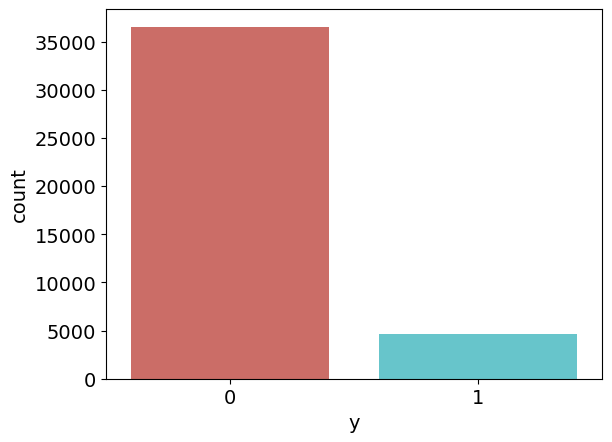

<Figure size 640x480 with 0 Axes>

In [15]:
sns.countplot(x='y',data=df1,palette='hls')
plt.show()
plt.savefig('count_plot')

In [19]:
df1.groupby('y').describe()

age                                                     duration  \
     count       mean        std   min   25%   50%   75%   max    count   
y                                                                         
0  36548.0  39.911185   9.898132  17.0  32.0  38.0  47.0  95.0  36548.0   
1   4640.0  40.913147  13.837476  17.0  31.0  37.0  50.0  98.0   4640.0   

               ... euribor3m        nr_employed                          \
         mean  ...       75%    max       count         mean        std   
y              ...                                                        
0  220.844807  ...     4.962  5.045     36548.0  5176.166600  64.571979   
1  553.191164  ...     4.406  5.045      4640.0  5095.115991  87.572641   

                                           
      min     25%     50%     75%     max  
y                                          
0  4963.6  5099.1  5195.8  5228.1  5228.1  
1  4963.6  5017.5  5099.1  5191.0  5228.1  

[2 rows x 80 columns]

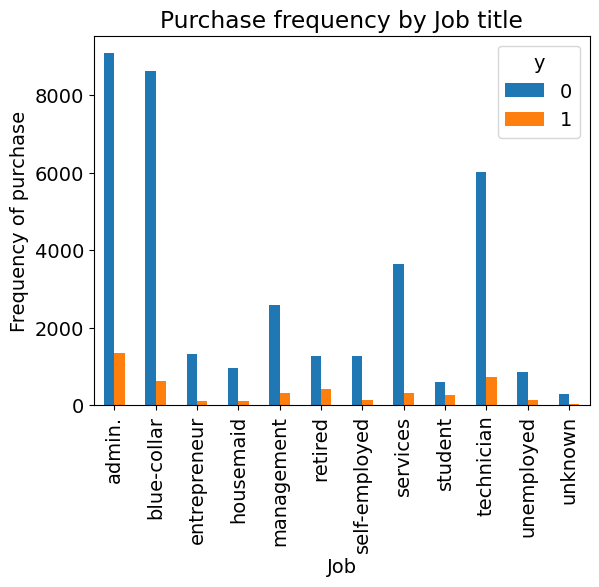

In [21]:
%matplotlib inline
pd.crosstab(df1.job,df1.y).plot(kind='bar')
plt.title('Purchase frequency by Job title')
plt.xlabel('Job')
plt.ylabel('Frequency of purchase')
plt.savefig('purchase_by_job')

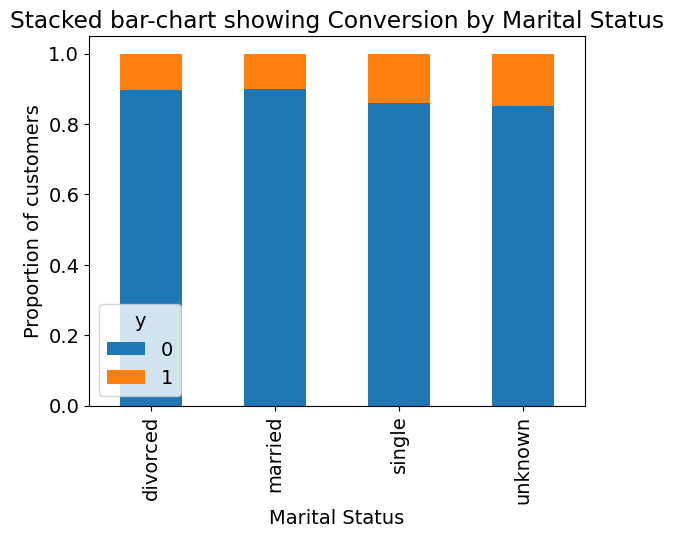

In [54]:
%matplotlib inline
table = pd.crosstab(df1.marital,df1.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked bar-chart showing Conversion by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of customers')
plt.savefig('purchase_by_Marital Status')

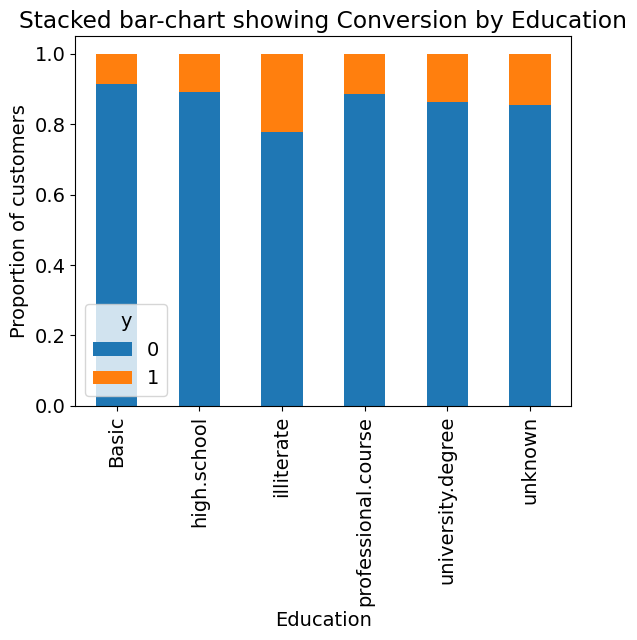

In [24]:
%matplotlib inline
table = pd.crosstab(df1.education,df1.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked bar-chart showing Conversion by Education')
plt.xlabel('Education')
plt.ylabel('Proportion of customers')
plt.savefig('purchase_by_edu')

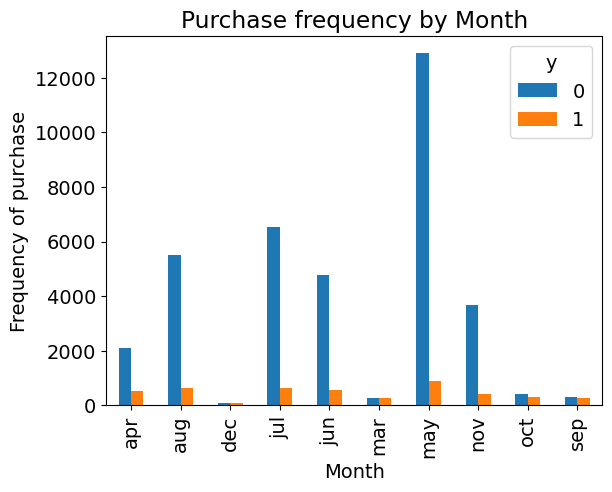

In [55]:
%matplotlib inline
pd.crosstab(df1.month,df1.y).plot(kind='bar')
plt.title('Purchase frequency by Month')
plt.xlabel('Month')
plt.ylabel('Frequency of purchase')
plt.savefig('purchase_by_month')

In [31]:
categorical_variable_cols = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

for var in categorical_variable_cols:
    categ_list = 'var_' + var
    categ_list = pd.get_dummies(df1[var],prefix = var)
    data1=df1.join(categ_list)
    df1 = data1

## Creating feilds to keep
data_vars = data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in categorical_variable_cols]

In [32]:
data_final = df1[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype=object)

In [33]:
data_final_vars = data_final.columns.values.tolist()
y=['y']
X = [i for i in data_final_vars if i not in y]

In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# Correct way: use named argument for n_features_to_select
rfe = RFE(estimator=logreg, n_features_to_select=18)

rfe = rfe.fit(data_final[X], data_final[y])

Selected_Features_Support = list(rfe.support_)
Selected_Features_rank = list(rfe.ranking_)

print(Selected_Features_Support)
print(Selected_Features_rank)

D:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[True, True, True, True, True, True, True, True, True, True, True, True, True]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
print(data_final.columns.tolist())


['age', 'marital', 'education', 'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'default_unknown', 'default_yes', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success']


In [39]:
categorical_cols = ['job', 'default', 'month', 'day_of_week', 'poutcome']
data_final = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


In [44]:

columns_final = [
    "previous", "euribor3m",
    "job_blue-collar", "job_retired", "job_services", "job_student",
    "default_unknown", "default_yes",  # corrected
    "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep",
    "day_of_week_wed",  # keep existing only
    "poutcome_failure", "poutcome_nonexistent", "poutcome_success"
]

X = data_final[columns_final]
y = data_final['y']

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

LogisticRegression()

In [47]:
y_pred = logreg.predict(X_test)

## Calculating the accuracy

print('Accuracy of logistic regression classifier on test set: {:2f}'.format(logreg.score(X_test,y_test)))

Accuracy of logistic regression classifier on test set: 0.900461


In [56]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=10, shuffle=True, random_state=7)  # shuffle=True added
modelCV = LogisticRegression(max_iter=1000)  # optional: increase max_iter to avoid convergence warning
scoring = 'accuracy'

results = cross_val_score(modelCV, X, y, cv=kfold, scoring=scoring)
print("10-fold CV Accuracy: %.3f (± %.3f)" % (results.mean(), results.std()))


10-fold CV Accuracy: 0.898 (± 0.004)


In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)



[[10872   109]
 [ 1121   255]]


Thus, True Positive = 10872, False Positive = 1122, True Negative = 254, False Negative = 109

Precision = TP/(TP+FP)

Recall = TP/(TP+FN)

F score = 2 * (Precision * Recall)/(Precision + Recall)


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10981
           1       0.70      0.19      0.29      1376

    accuracy                           0.90     12357
   macro avg       0.80      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357



model has a high overall precision and recall, and F-score.